In [1]:
import pandas as pd

# Load all datasets
landcover_df = pd.read_csv("landcoverdata.csv")
population_df = pd.read_csv("populationdensitydata.csv")
realestate_df = pd.read_csv("realestatedata.csv")
transport_df = pd.read_csv("transportdata.csv")

# Display basic info
for name, df in zip(
    ["Landcover", "Population", "Real Estate", "Transport"],
    [landcover_df, population_df, realestate_df, transport_df]
):
    print(f"\n{name} Dataset:")
    print(df.shape)
    print(df.columns.tolist())

  



Landcover Dataset:
(3339366, 50)
['ID', 'X', 'Y', 'Area', 'City', 'Country', 'Continent', 'GridEPSG', 'dCenter', 'OpenedToUrb', 'ClosedToUrb', 'ESACCI10', 'ESACCI11', 'ESACCI12', 'ESACCI14', 'ESACCI20', 'ESACCI30', 'ESACCI40', 'ESACCI50', 'ESACCI60', 'ESACCI61', 'ESACCI62', 'ESACCI70', 'ESACCI71', 'ESACCI72', 'ESACCI80', 'ESACCI81', 'ESACCI82', 'ESACCI90', 'ESACCI100', 'ESACCI110', 'ESACCI120', 'ESACCI121', 'ESACCI122', 'ESACCI130', 'ESACCI140', 'ESACCI150', 'ESACCI151', 'ESACCI152', 'ESACCI153', 'ESACCI160', 'ESACCI170', 'ESACCI180', 'ESACCI190', 'ESACCI200', 'ESACCI201', 'ESACCI202', 'ESACCI210', 'ESACCI220', 'ESACCI230']

Population Dataset:
(6709164, 12)
['ID', 'X', 'Y', 'Area', 'City', 'Country', 'Continent', 'GridEPSG', 'dCenter', 'PopDensitySource', 'PopDensityYear', 'PopDensity']

Real Estate Dataset:
(3339366, 38)
['ID', 'X', 'Y', 'Area', 'City', 'Country', 'Continent', 'GridEPSG', 'dCenter', 'Currency', 'TransactionType', 'TransactionSource', 'TransactionMonth', 'Transaction

## Preprocessing

In [16]:
possible_keys = set(landcover_df.columns) & set(population_df.columns) & set(realestate_df.columns) & set(transport_df.columns)
print("\n Common columns across all datasets:", possible_keys)

merge_key = None
for key in ['region', 'city', 'area', 'district', 'id']:
    if key in possible_keys:
        merge_key = key
        break

if not merge_key:
    raise KeyError(" No valid merge key found! Please check dataset column names.")

print(f"\n Using merge key: {merge_key}")



 Common columns across all datasets: {'city'}

 Using merge key: city


In [17]:
def aggregate_df(df, key):
    numeric_cols = df.select_dtypes(include='number').columns.tolist()
    non_numeric_cols = [c for c in df.columns if c not in numeric_cols + [key]]
    
    agg_dict = {col: 'median' for col in numeric_cols}  # numeric -> median
    for col in non_numeric_cols:
        agg_dict[col] = 'first'  # non-numeric -> take first occurrence
    
    df_agg = df.groupby(key).agg(agg_dict).reset_index()
    return df_agg

# Aggregate all datasets
landcover_df = aggregate_df(landcover_df, merge_key)
population_df = aggregate_df(population_df, merge_key)
realestate_df = aggregate_df(realestate_df, merge_key)
transport_df = aggregate_df(transport_df, merge_key)


In [18]:
import pandas as pd

def clean_columns(df):
    df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')
    return df

def aggregate_df(df, key):
    numeric_cols = df.select_dtypes(include='number').columns.tolist()
    non_numeric_cols = [c for c in df.columns if c not in numeric_cols + [key]]
    
    agg_dict = {col: 'median' for col in numeric_cols}  # numeric -> median
    for col in non_numeric_cols:
        agg_dict[col] = 'first'  # non-numeric -> first
    
    return df.groupby(key).agg(agg_dict).reset_index()

def prepare_for_merge(df, key, prefix):
    # Add prefix to all non-key columns to avoid duplicates
    cols_to_rename = [c for c in df.columns if c != key]
    df = df.rename(columns={c: f"{prefix}_{c}" for c in cols_to_rename})
    return df

# Step 1: Clean
landcover_df = clean_columns(landcover_df)
population_df = clean_columns(population_df)
realestate_df = clean_columns(realestate_df)
transport_df = clean_columns(transport_df)

# Step 2: Aggregate
landcover_df = aggregate_df(landcover_df, merge_key)
population_df = aggregate_df(population_df, merge_key)
realestate_df = aggregate_df(realestate_df, merge_key)
transport_df = aggregate_df(transport_df, merge_key)

# Step 3: Add prefixes
landcover_df = prepare_for_merge(landcover_df, merge_key, 'landcover')
population_df = prepare_for_merge(population_df, merge_key, 'population')
realestate_df = prepare_for_merge(realestate_df, merge_key, 'realestate')
transport_df = prepare_for_merge(transport_df, merge_key, 'transport')

# Step 4: Merge sequentially
merged_df = landcover_df
for df in [population_df, realestate_df, transport_df]:
    merged_df = merged_df.merge(df, on=merge_key, how='outer')

# Step 5: Fill missing numeric values
merged_df.fillna(merged_df.median(numeric_only=True), inplace=True)

print("\nFinal merged dataset shape:", merged_df.shape)
print("Columns:", merged_df.columns.tolist())




Final merged dataset shape: (192, 113)
Columns: ['city', 'landcover_landcover_id', 'landcover_landcover_x', 'landcover_landcover_y', 'landcover_landcover_area', 'landcover_landcover_gridepsg', 'landcover_landcover_dcenter', 'landcover_landcover_openedtourb', 'landcover_landcover_closedtourb', 'landcover_landcover_esacci10', 'landcover_landcover_esacci11', 'landcover_landcover_esacci12', 'landcover_landcover_esacci14', 'landcover_landcover_esacci20', 'landcover_landcover_esacci30', 'landcover_landcover_esacci40', 'landcover_landcover_esacci50', 'landcover_landcover_esacci60', 'landcover_landcover_esacci61', 'landcover_landcover_esacci62', 'landcover_landcover_esacci70', 'landcover_landcover_esacci71', 'landcover_landcover_esacci72', 'landcover_landcover_esacci80', 'landcover_landcover_esacci81', 'landcover_landcover_esacci82', 'landcover_landcover_esacci90', 'landcover_landcover_esacci100', 'landcover_landcover_esacci110', 'landcover_landcover_esacci120', 'landcover_landcover_esacci121

In [42]:
merged_df.to_csv("cleaned_urban_dataset.csv", index=False)
print("\n Cleaned dataset saved as 'cleaned_urban_dataset.csv'")


 Cleaned dataset saved as 'cleaned_urban_dataset.csv'


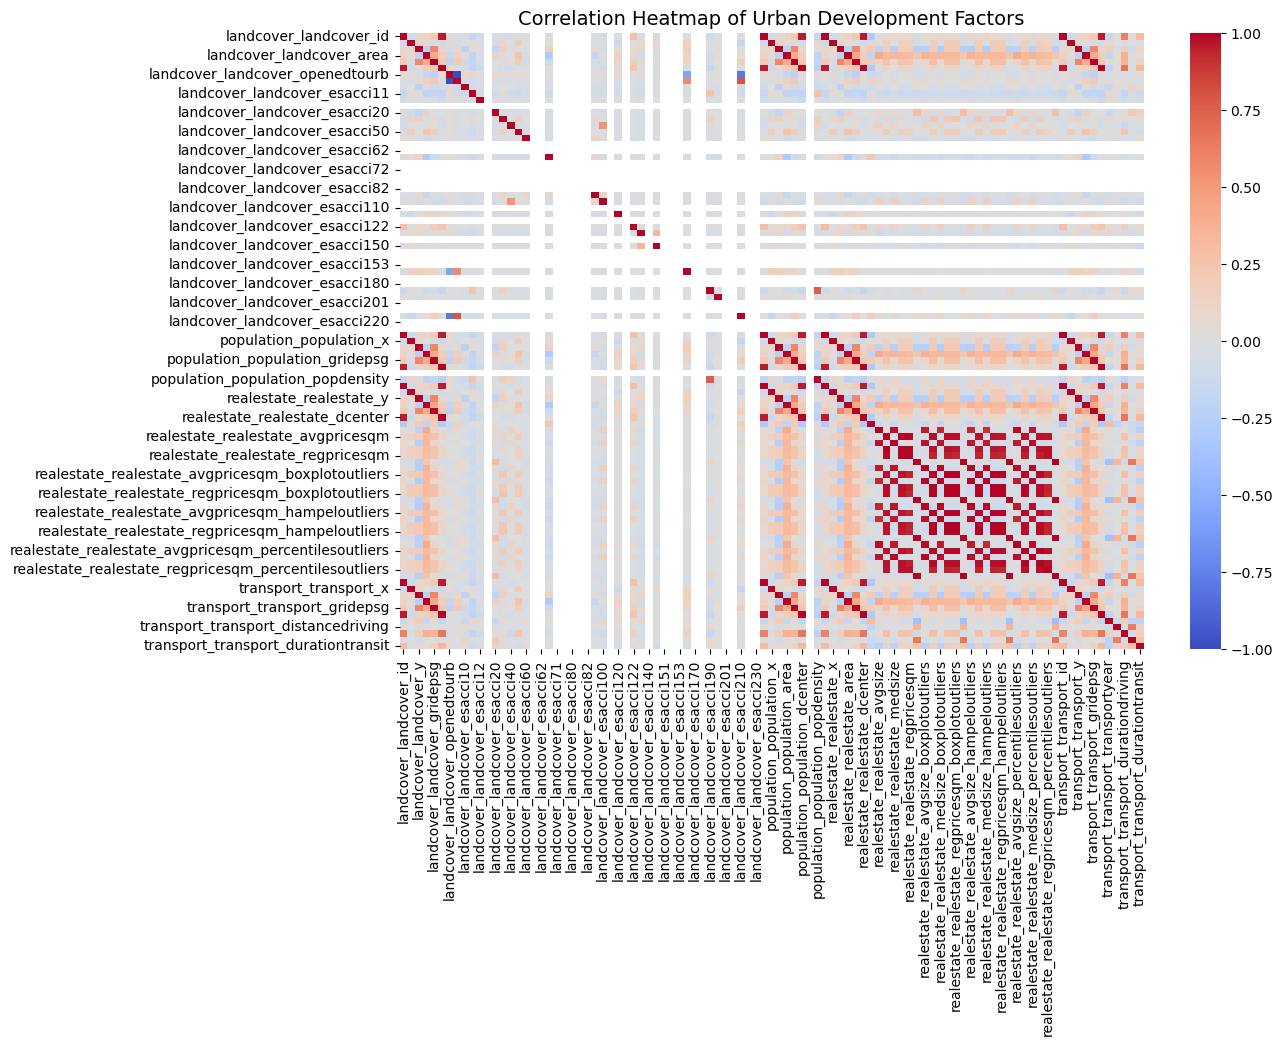

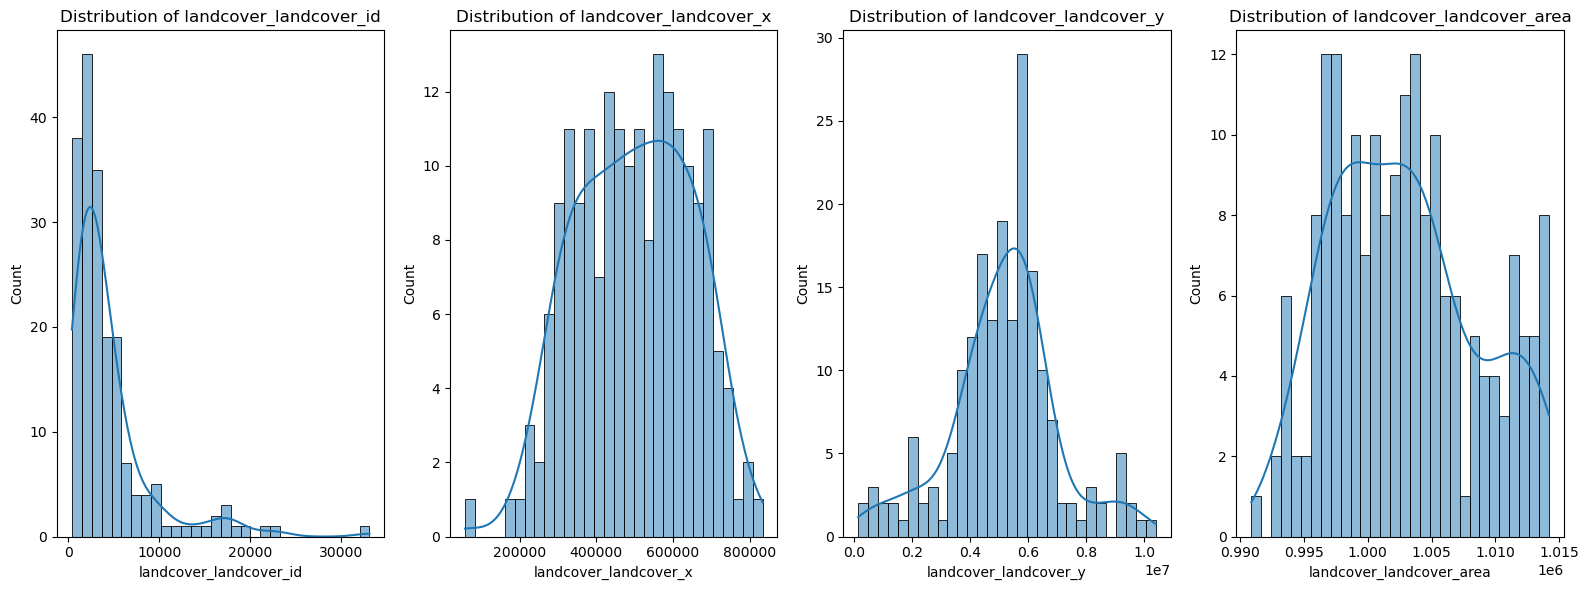

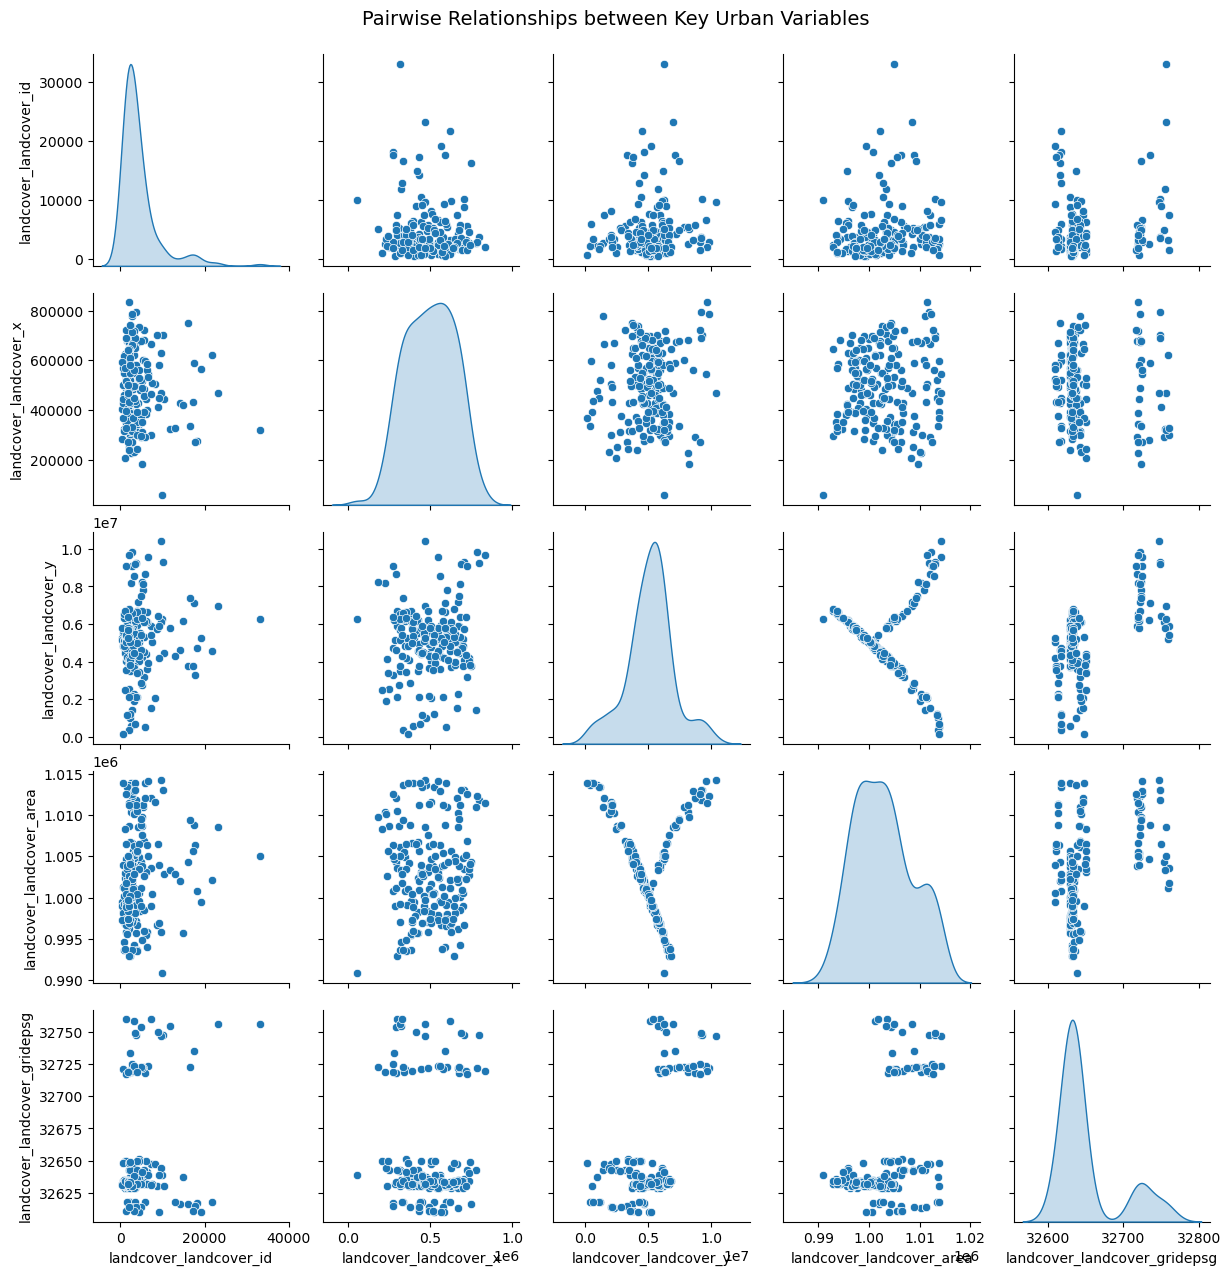

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 8))
numeric_cols = merged_df.select_dtypes(include='number').columns
corr_matrix = merged_df[numeric_cols].corr()

sns.heatmap(corr_matrix, annot=False, cmap='coolwarm')
plt.title("Correlation Heatmap of Urban Development Factors", fontsize=14)
plt.show()

plt.figure(figsize=(16, 6))
for i, col in enumerate(numeric_cols[:4], 1):  # first 4 numeric columns 
    plt.subplot(1, 4, i)
    sns.histplot(merged_df[col], kde=True, bins=30)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

if 'price' in merged_df.columns:
    top_features = corr_matrix['price'].abs().sort_values(ascending=False).index[:5]
else:
    top_features = numeric_cols[:5]  # fallback: first 5 numeric features

sns.pairplot(merged_df[top_features], diag_kind='kde')
plt.suptitle("Pairwise Relationships between Key Urban Variables", y=1.02, fontsize=14)
plt.show()


## Model Training and Further Improvement

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM, Conv1D, Flatten
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.inspection import permutation_importance


In [23]:
merged_df = pd.read_csv("cleaned_urban_dataset.csv")

# Update exclude_cols to match your prefixed column names
exclude_cols = ['id_x','id_y','id','x_x','x_y','x','y_x','y_y','y','currency',
                'realestate_realestate_avgpricesqm']  # also exclude target from features

# Select numeric columns
numeric_cols = merged_df.select_dtypes(include='number').columns

# Feature columns (all numeric except excluded ones and target)
feature_cols = [col for col in numeric_cols if col not in exclude_cols]

X = merged_df[feature_cols]
y = merged_df['realestate_realestate_avgpricesqm']  # correct target column

# Fill missing values
X.fillna(X.median(), inplace=True)
y.fillna(y.median(), inplace=True)


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_6976\2949356907.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.fillna(X.median(), inplace=True)


In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [25]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [26]:
early_stop = EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True)

C:\Users\LENOVO\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 90ms/step - loss: 1980950249472.0000 - mae: 332744.7812 - val_loss: 216870273024.0000 - val_mae: 129137.7109
Epoch 2/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 1980948414464.0000 - mae: 332743.9375 - val_loss: 216869945344.0000 - val_mae: 129137.0781
Epoch 3/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 1980947365888.0000 - mae: 332743.2188 - val_loss: 216869601280.0000 - val_mae: 129136.4688
Epoch 4/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 1980944482304.0000 - mae: 332742.3750 - val_loss: 216869306368.0000 - val_mae: 129135.8828
Epoch 5/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 1980943564800.0000 - mae: 332741.5625 - val_loss: 216868913152.0000 - val_mae: 129135.2422
Epoch 6/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 1980940550144.0000 - mae: 332740.6250 - val_loss: 216868470784.0000 - val_mae: 129134.5469
Epoch 7/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 1980937404416.0000 - mae: 332739.6875 - val_loss

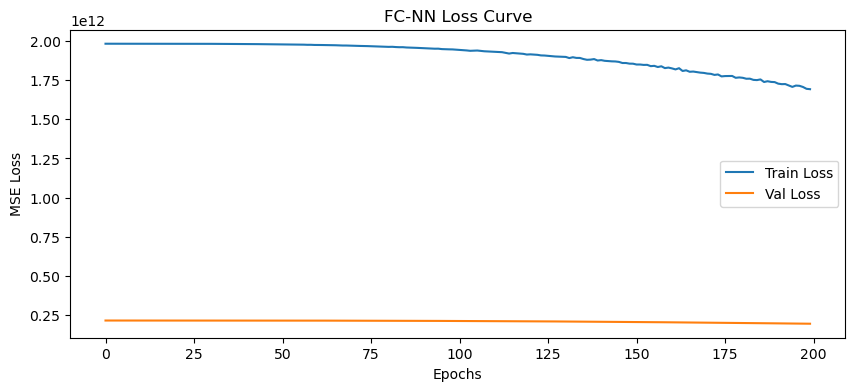

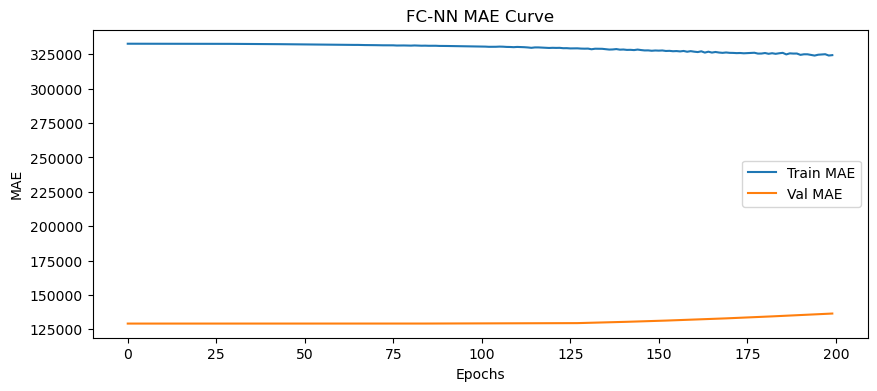

 Fully Connected NN Performance
MAE: 758166.392415692
MSE: 18207015519900.676
R2: -308.53978528149


In [27]:
fc_model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dense(1)
])
fc_model.compile(optimizer='adam', loss='mse', metrics=['mae'])

history_fc = fc_model.fit(
    X_train_scaled, y_train,
    validation_split=0.2,
    epochs=200,
    batch_size=32,
    callbacks=[early_stop],
    verbose=1
)

# Predictions
y_pred_fc = fc_model.predict(X_test_scaled)

# Plot learning curves
plt.figure(figsize=(10,4))
plt.plot(history_fc.history['loss'], label='Train Loss')
plt.plot(history_fc.history['val_loss'], label='Val Loss')
plt.title("FC-NN Loss Curve")
plt.xlabel("Epochs")
plt.ylabel("MSE Loss")
plt.legend()
plt.show()

plt.figure(figsize=(10,4))
plt.plot(history_fc.history['mae'], label='Train MAE')
plt.plot(history_fc.history['val_mae'], label='Val MAE')
plt.title("FC-NN MAE Curve")
plt.xlabel("Epochs")
plt.ylabel("MAE")
plt.legend()
plt.show()

# FC Performance
print(" Fully Connected NN Performance")
print("MAE:", mean_absolute_error(y_test, y_pred_fc))
print("MSE:", mean_squared_error(y_test, y_pred_fc))
print("R2:", r2_score(y_test, y_pred_fc))

In [28]:
X_train_seq = np.expand_dims(X_train_scaled, axis=1)
X_test_seq = np.expand_dims(X_test_scaled, axis=1)

lstm_model = Sequential([
    LSTM(64, activation='relu', input_shape=(X_train_seq.shape[1], X_train_seq.shape[2])),
    Dense(32, activation='relu'),
    Dense(1)
])
lstm_model.compile(optimizer='adam', loss='mse', metrics=['mae'])

history_lstm = lstm_model.fit(
    X_train_seq, y_train,
    validation_split=0.2,
    epochs=200,
    batch_size=32,
    callbacks=[early_stop],
    verbose=1
)

y_pred_lstm = lstm_model.predict(X_test_seq)
print(" LSTM NN Performance")
print("MAE:", mean_absolute_error(y_test, y_pred_lstm))
print("MSE:", mean_squared_error(y_test, y_pred_lstm))
print("R2:", r2_score(y_test, y_pred_lstm))


Epoch 1/200


C:\Users\LENOVO\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 113ms/step - loss: 1980951035904.0000 - mae: 332745.6250 - val_loss: 216870748160.0000 - val_mae: 129138.9375
Epoch 2/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 1980950642688.0000 - mae: 332745.5312 - val_loss: 216870715392.0000 - val_mae: 129138.8984
Epoch 3/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 1980950511616.0000 - mae: 332745.4688 - val_loss: 216870699008.0000 - val_mae: 129138.8438
Epoch 4/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 1980949987328.0000 - mae: 332745.3750 - val_loss: 216870649856.0000 - val_mae: 129138.7969
Epoch 5/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 1980949594112.0000 - mae: 332745.2812 - val_loss: 216870567936.0000 - val_mae: 129138.7266
Epoch 6/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 1980948545536.0000 - mae: 332745.1250 - val_loss: 216870518784.0000 - val_mae: 129138.6641
Epoch 7/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 1980947365888.0000 - mae: 332744.9375 - val_loss: 216870453

In [29]:
landcover_cols = [c for c in feature_cols if 'esacci' in c][:10]
if len(landcover_cols) >= 3:
    X_train_cnn = X_train[landcover_cols].values[..., np.newaxis]
    X_test_cnn = X_test[landcover_cols].values[..., np.newaxis]

    cnn_model = Sequential([
        Conv1D(32, kernel_size=3, activation='relu', input_shape=(X_train_cnn.shape[1],1)),
        Conv1D(16, kernel_size=3, activation='relu'),
        Flatten(),
        Dense(32, activation='relu'),
        Dense(1)
    ])
    cnn_model.compile(optimizer='adam', loss='mse', metrics=['mae'])
    history_cnn = cnn_model.fit(
        X_train_cnn, y_train,
        validation_split=0.2,
        epochs=150,
        batch_size=32,
        callbacks=[early_stop],
        verbose=1
    )

    y_pred_cnn = cnn_model.predict(X_test_cnn)
    print(" CNN Performance")
    print("MAE:", mean_absolute_error(y_test, y_pred_cnn))
    print("MSE:", mean_squared_error(y_test, y_pred_cnn))
    print("R2:", r2_score(y_test, y_pred_cnn))


Epoch 1/150


C:\Users\LENOVO\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 92ms/step - loss: 1979643723776.0000 - mae: 334016.1562 - val_loss: 211498663936.0000 - val_mae: 127251.9453
Epoch 2/150
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 1977310248960.0000 - mae: 333342.5312 - val_loss: 208426795008.0000 - val_mae: 127493.2734
Epoch 3/150
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 1975949590528.0000 - mae: 333349.9062 - val_loss: 205888831488.0000 - val_mae: 128128.3359
Epoch 4/150
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 1974947807232.0000 - mae: 334216.4688 - val_loss: 202998726656.0000 - val_mae: 128810.9141
Epoch 5/150
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 1973176893440.0000 - mae: 334690.5625 - val_loss: 199748534272.0000 - val_mae: 128857.1016
Epoch 6/150
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 1972139458560.0000 - mae: 335388.1875 - val_loss: 195786932224.0000 - val_mae: 128337.7578
Epoch 7/150
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 1969443831808.0000 - mae: 335373.8438 - val_loss: 1920505282

In [30]:
comparison = pd.DataFrame({
    'Model': ['FC-NN','LSTM'] + (['CNN'] if len(landcover_cols) >= 3 else []),
    'MAE': [mean_absolute_error(y_test, y_pred_fc), mean_absolute_error(y_test, y_pred_lstm)] + ([mean_absolute_error(y_test, y_pred_cnn)] if len(landcover_cols) >=3 else []),
    'MSE': [mean_squared_error(y_test, y_pred_fc), mean_squared_error(y_test, y_pred_lstm)] + ([mean_squared_error(y_test, y_pred_cnn)] if len(landcover_cols) >=3 else []),
    'R2': [r2_score(y_test, y_pred_fc), r2_score(y_test, y_pred_lstm)] + ([r2_score(y_test, y_pred_cnn)] if len(landcover_cols) >=3 else [])
})
print("\n Model Comparison:")
print(comparison)



 Model Comparison:
   Model            MAE           MSE          R2
0  FC-NN  758166.392416  1.820702e+13 -308.539785
1   LSTM   42428.083649  6.061282e+10   -0.030486
2    CNN   54534.543390  6.301458e+10   -0.071319


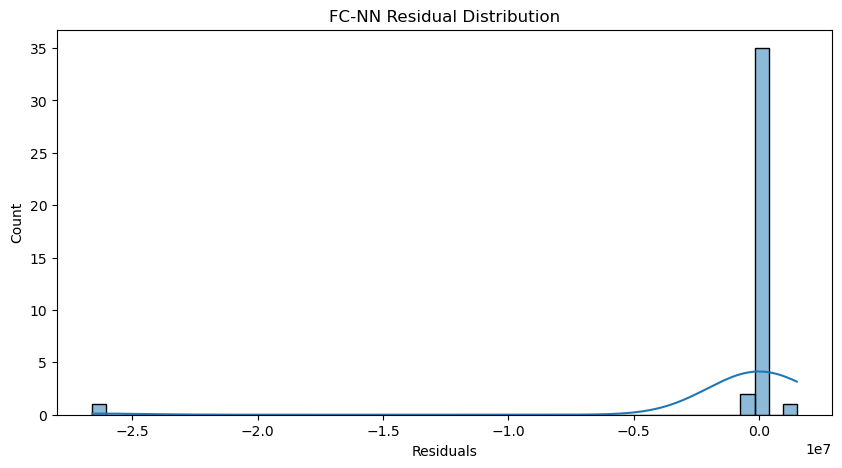

In [31]:
residuals_fc = y_test - y_pred_fc.flatten()
plt.figure(figsize=(10,5))
sns.histplot(residuals_fc, kde=True, bins=50)
plt.title("FC-NN Residual Distribution")
plt.xlabel("Residuals")
plt.show()


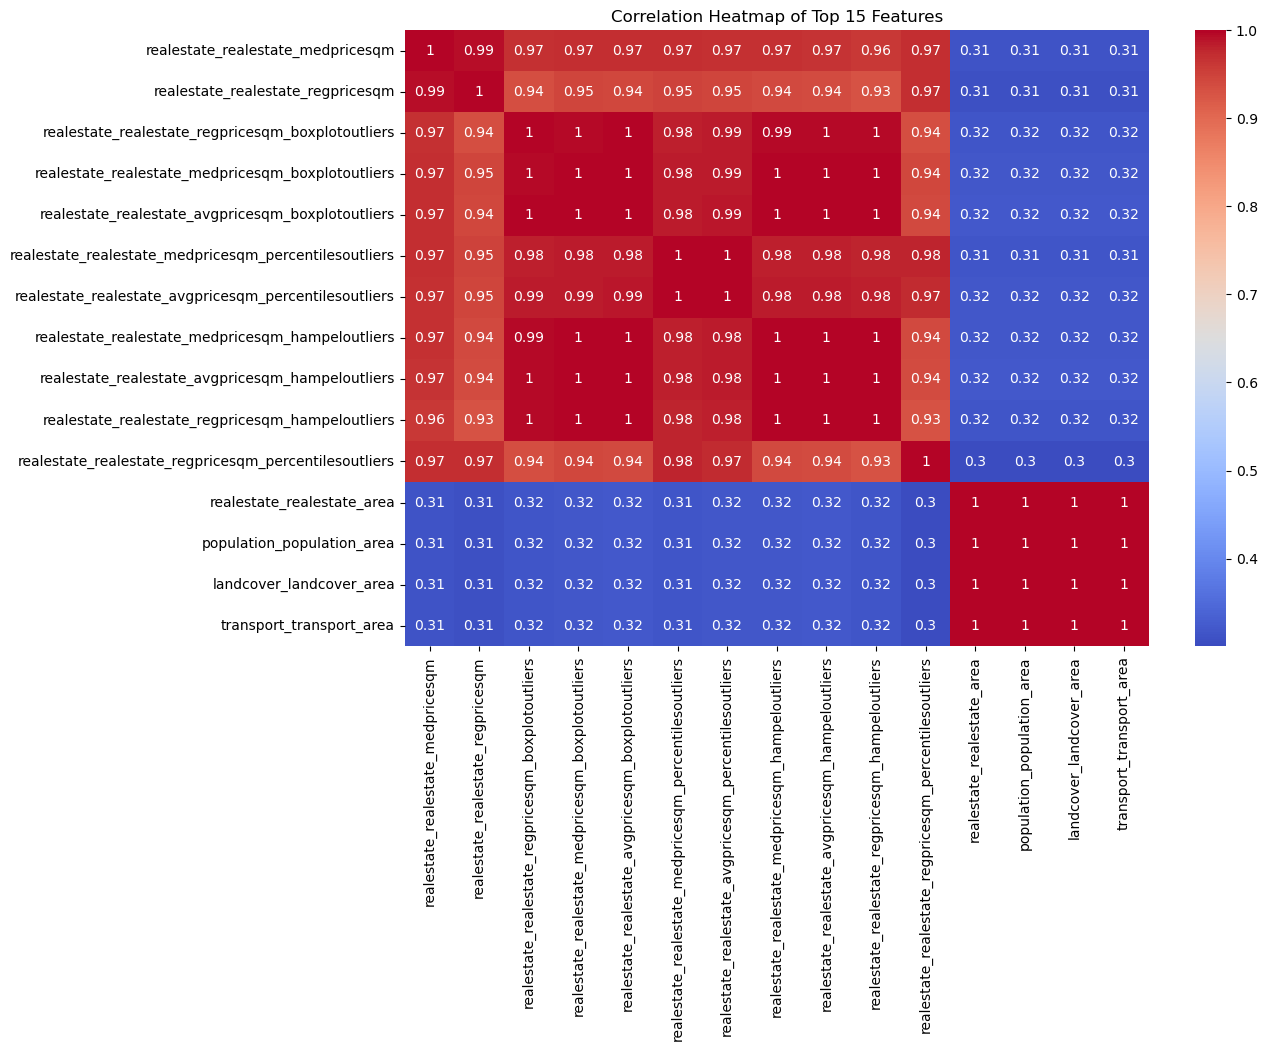

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns

numeric_df = merged_df.select_dtypes(include='number')

corr_matrix = numeric_df.corr()

target_col = 'realestate_realestate_avgpricesqm'
top_features = corr_matrix[target_col].abs().sort_values(ascending=False).head(16).index.tolist()
top_features.remove(target_col) 

# Plot correlation heatmap
plt.figure(figsize=(12,8))
sns.heatmap(numeric_df[top_features].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap of Top 15 Features")
plt.show()


## Deployement

In [71]:
# urban_data_explorer_safe.py
import streamlit as st
import pandas as pd

st.set_page_config(page_title="Urban Data Explorer", layout="wide")
st.title("Urban Data Explorer (Memory Efficient & Safe)")

# -----------------------------
# Load datasets safely
# -----------------------------
@st.cache_data
def load_data(nrows=100000):
    try:
        # Load only a subset to save memory
        landcover = pd.read_csv("LandcoverData.csv", nrows=nrows)
        population = pd.read_csv("PopulationData.csv", nrows=nrows)
        realestate = pd.read_csv("RealEstateData.csv", nrows=nrows)
        transport = pd.read_csv("TransportData.csv", nrows=nrows)

        merged_df = landcover.merge(population, on='city', how='outer') \
                             .merge(realestate, on='city', how='outer') \
                             .merge(transport, on='city', how='outer')
        return merged_df
    except FileNotFoundError as e:
        st.error(f"Dataset file not found: {e}")
        return pd.DataFrame()  # empty df to prevent crashes

data = load_data()

if data.empty:
    st.warning("No data loaded. Please make sure the CSV files are in the same folder as this script.")
    st.stop()

# -----------------------------
# Filtering options
# -----------------------------
st.subheader("Filter Data")
merge_keys = [col for col in data.columns if col.lower() in ['city', 'region', 'area', 'district', 'id']]

if merge_keys:
    selected_key = st.selectbox("Filter by:", merge_keys)
    if selected_key:
        unique_values = data[selected_key].dropna().unique()
        selected_values = st.multiselect(f"Select {selected_key}:", unique_values)
        filtered_data = data[data[selected_key].isin(selected_values)] if selected_values else data
else:
    filtered_data = data

# -----------------------------
# Show limited rows only
# -----------------------------
st.write(f"Showing first 1000 rows of {len(filtered_data)} filtered rows:")
if not filtered_data.empty:
    st.dataframe(filtered_data.head(1000))
else:
    st.info("No data matches the selected filter.")

# -----------------------------
# Summary stats
# -----------------------------
st.subheader("Summary Statistics (numeric only to save memory)")
if not filtered_data.empty and filtered_data.select_dtypes(include='number').shape[1] > 0:
    st.write(filtered_data.describe())
else:
    st.info("No numeric columns to describe.")

# -----------------------------
# Download filtered data
# -----------------------------
st.subheader("Download Filtered Data")
if not filtered_data.empty:
    csv = filtered_data.to_csv(index=False).encode('utf-8')
    st.download_button(
        label="Download CSV",
        data=csv,
        file_name="filtered_urban_data.csv",
        mime="text/csv"
    )
else:
    st.info("No data to download.")

  

2025-10-23 02:57:41.479 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-23 02:57:41.482 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-23 02:57:41.484 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-23 02:57:41.489 No runtime found, using MemoryCacheStorageManager
2025-10-23 02:57:41.492 No runtime found, using MemoryCacheStorageManager
2025-10-23 02:57:41.495 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-23 02:57:41.496 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-23 02:57:41.498 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-23 02:57:42.038 Thread 'Thread-14': missing ScriptRunContext! This warning can be ignore

In [72]:
import subprocess
import webbrowser
import time

# Run Streamlit in background
subprocess.Popen(["streamlit", "run", "urban_data_explorer.py"])

# Wait a few seconds and open browser
time.sleep(5)
webbrowser.open("http://localhost:8501")





True